In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn은 plt 를 깔끔하게 해줌
plt.style.use("seaborn")

# 기본 font size 설정
sns.set(font_scale=2.5)

# dataset에서 NULL 데이터의 분포를 깔끔하게 시각화함
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\younho\AppData\Local\Temp\ipykernel_9856\20193199.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 여기서 cabin과 embared 특징은 나타나지 않았다
# string 형태라서 통계적 수치를 뽑아내지 못함
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# test 데이터라서 죽었는지 살았는지 확인 불가능
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# NULL data check
# shape: (891, 12)
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train.shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [12]:
for col in df_test.columns:
    msg = "column: {:>10}\t Percent of NaN value: {:.2f}%".format(col, 100 * (df_test[col].isnull().sum() / df_test.shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot: >

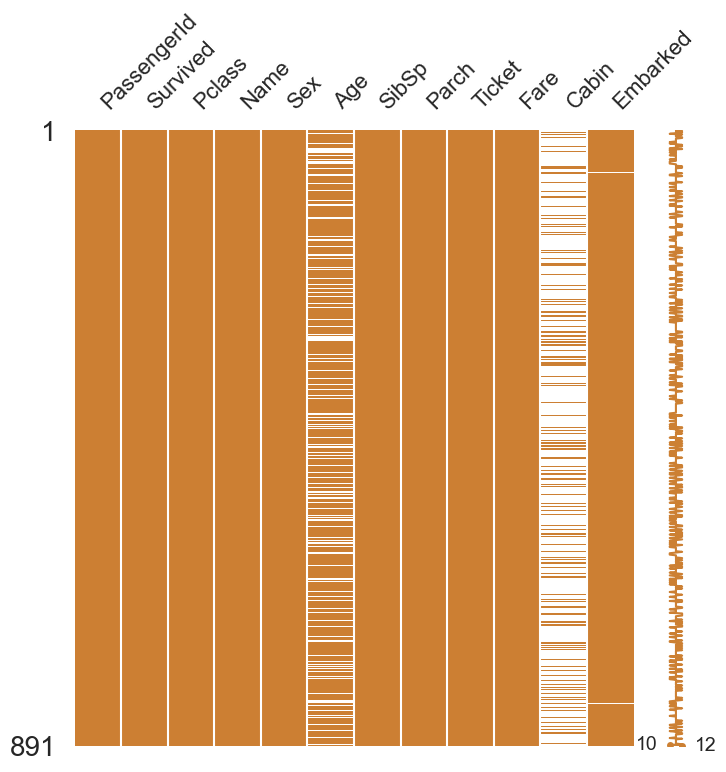

In [15]:
# iloc은 pandas의 dataframe형태의 dataset을 index 형태로 접근
# 첫번째 index는 행, 두번째 index는 열을 뜻함.
# 구멍이 숭숭 뚫려있는 곳이 NULL 값을 뜻한다.
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot: >

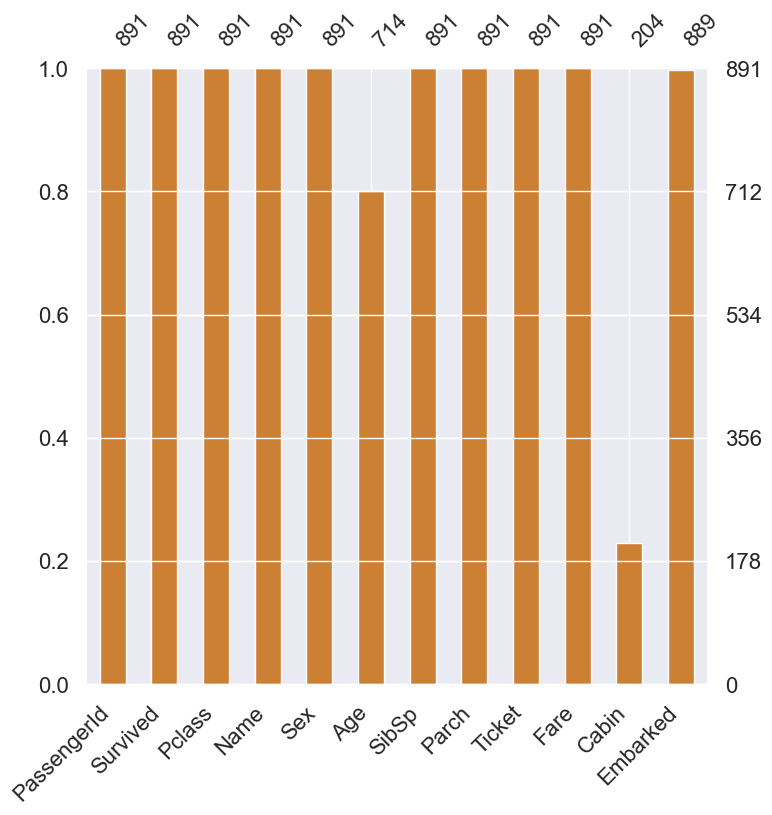

In [19]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot: >

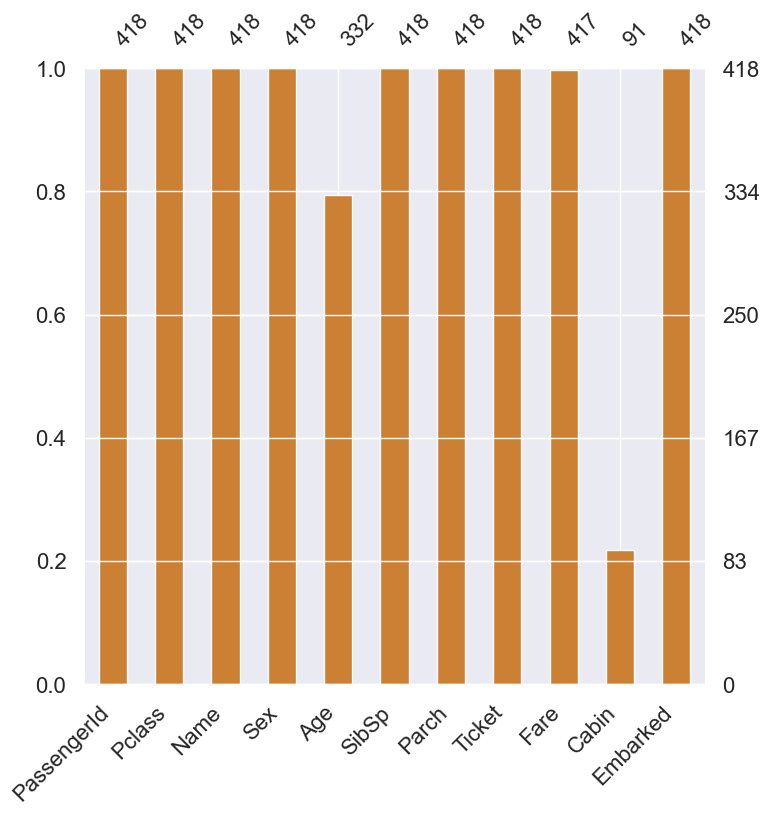

In [20]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

# Target Label 확인

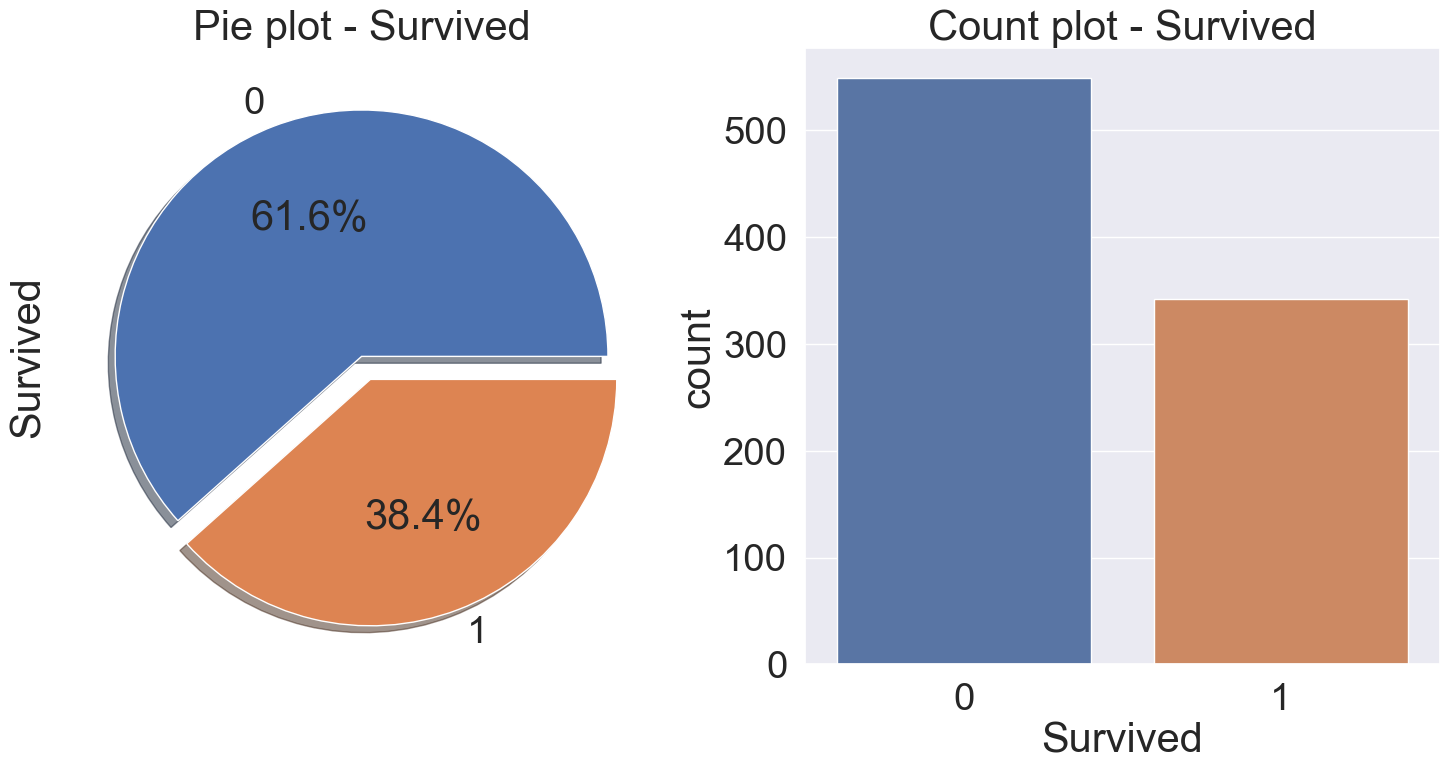

In [29]:
# 1 x 2 크기의 subplot 생성
# f 는 전체 1 x 2 fig를 뜻하고, ax 는 각 subplot를 index형태로 저장
f, ax = plt.subplots(1, 2, figsize=(18,8))

# explode: pie가 튀어나오는 것 설정
# autopct: 각 pie에 percentage 나오도록 출력
# shadow: 음영 추가
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)

ax[0].set_title("Pie plot - Survived")
sns.countplot(x= "Survived",data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()


In [34]:
# P class는 사람의 카테고리를 뜻함
# df_train[['Pclass', 'Survived']] 를 통해서 891 x 2 차원의 데이터를 가져오고
# groupby를 통해 각 Pclass마다 Survived를 묶는 작업을 수행한다.
# 그뒤에 count를 통해서 각 class마다 몇명있는지 확인 가능
df_train[['Pclass', 'Survived']].groupby(["Pclass"], as_index=True).count()


,Survived
Pclass,
1,216
2,184
3,491


In [35]:
# survived가 1이면 살아 남는 경우므로 sum을 통해서 살아 남은 사람 확인 가능 (각 클래스마다)
df_train[['Pclass', 'Survived']].groupby(["Pclass"], as_index=True).sum()


,Survived
Pclass,
1,136
2,87
3,119


In [37]:
pd.crosstab(df_train['Pclass'], df_train["Survived"], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

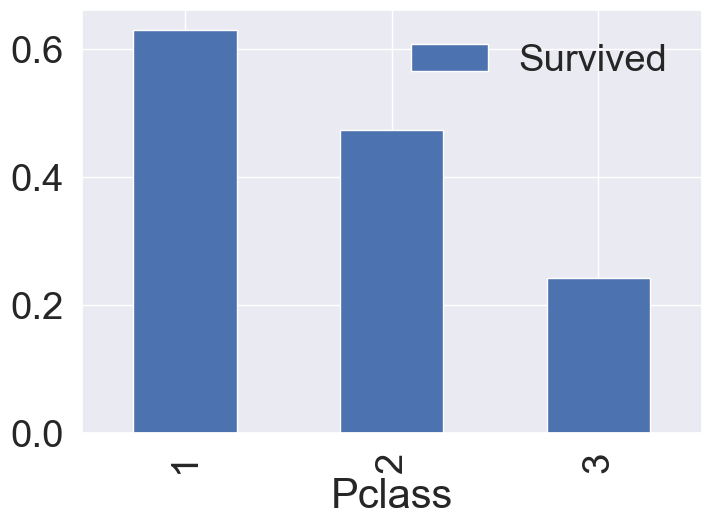

In [39]:
# mean을 통해서 생존율도 확인 가능
df_train[['Pclass', 'Survived']].groupby("Pclass", as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

Text(0.5, 1.02, 'Pclass: Survived vs Dead')

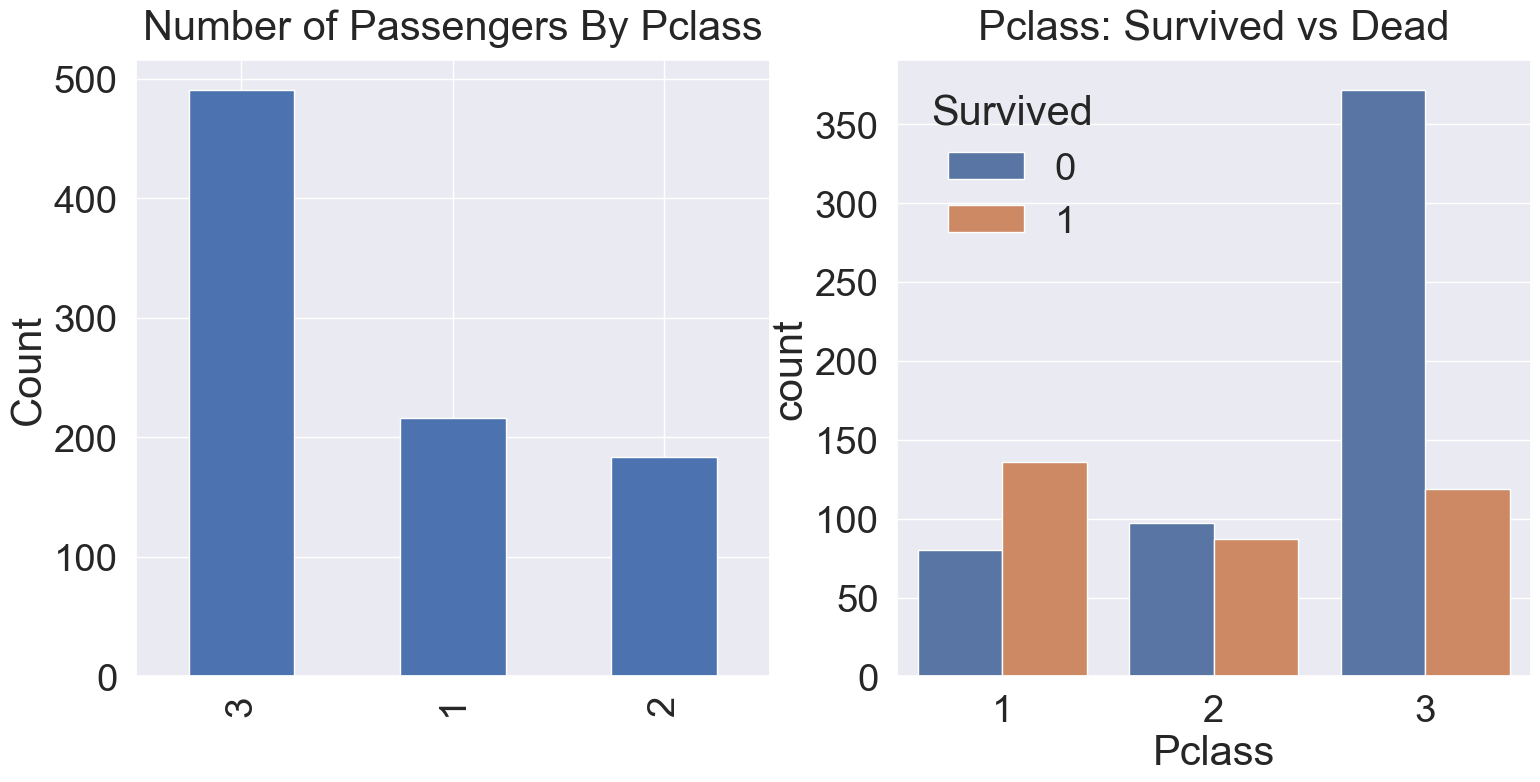

In [44]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title("Number of Passengers By Pclass", y=y_position)
ax[0].set_ylabel("Count")

# hue를 통하여 Pclass에 따라 survive의 개수를 확인할 수 있다.
# class가 낮으면 생존률이 좋다.
sns.countplot(x="Pclass", hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead", y=y_position)


Text(0.5, 1.0, 'Sex: Survived vs Dead')

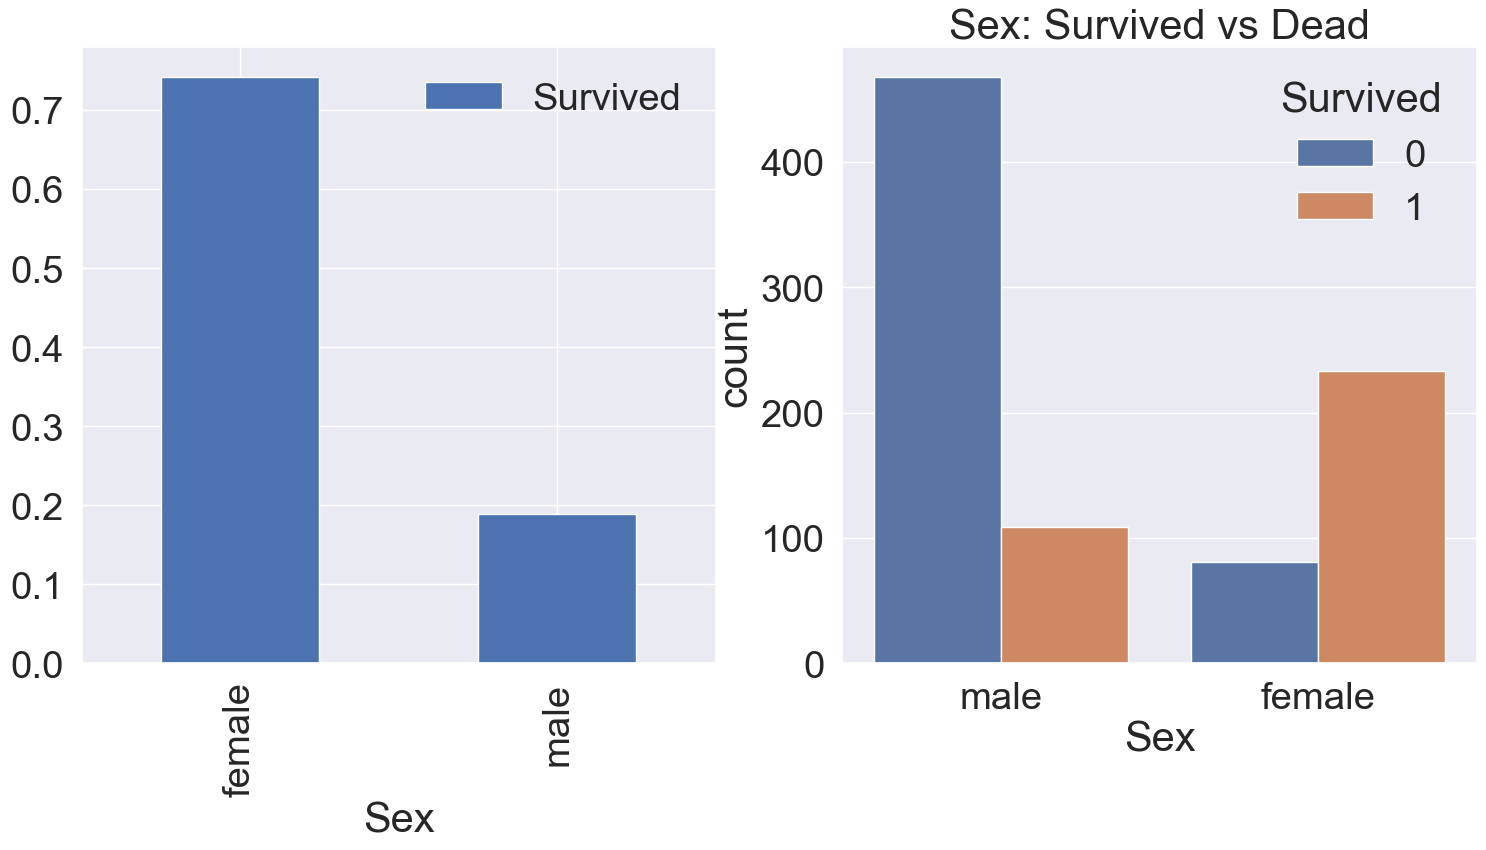

In [50]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 성별에 따라서 생존률을 측정한다.
df_train[['Sex', 'Survived']].groupby("Sex", as_index=True).mean().plot.bar(ax = ax[0])

# seanborn countplot를 통해서 남자는 몇명에서 몇명 살았는지, 여자는 몇명에서 몇명살았는지 본다
sns.countplot(x='Sex', data=df_train, ax=ax[1], hue= "Survived")
ax[1].set_title("Sex: Survived vs Dead")

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

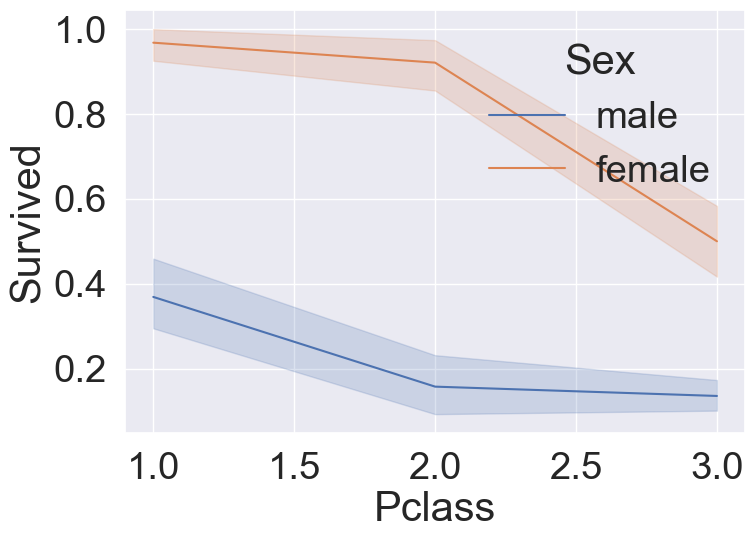

In [63]:
# 지금까지 구했던 성별, pclass에 관해서 얼마나 연관이 있는지 확인해봅니다.
# factorplot이 없어서 lineplot으로 수행
# Pclass가 어느정도영향은 있지만 성별만큼 영향을 주진 않음
sns.lineplot(x="Pclass", y="Survived", hue="Sex", data=df_train)

# 나이

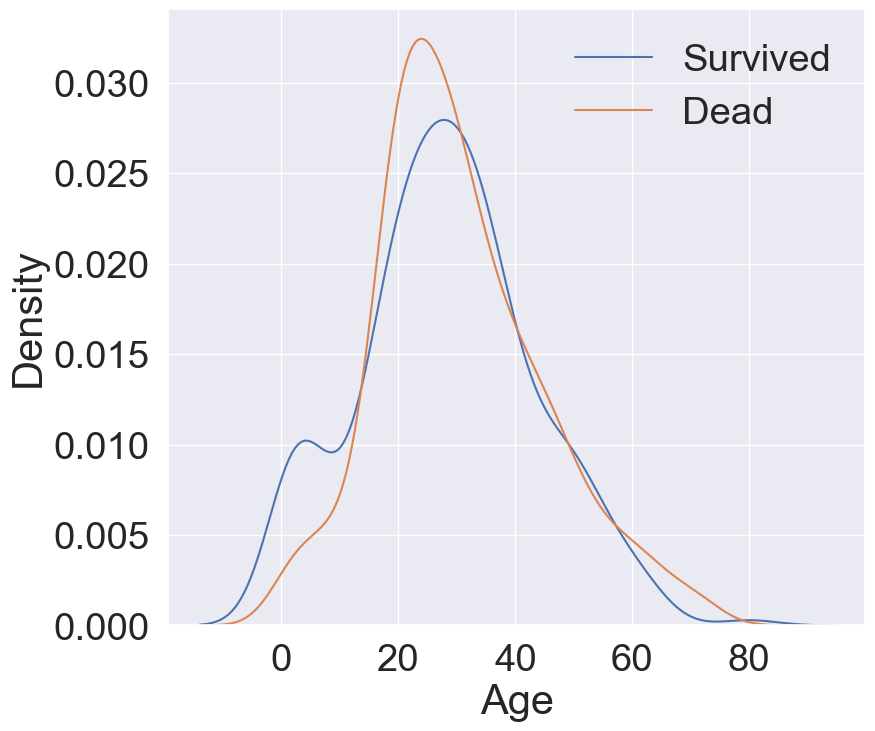

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

# KDE (커널 밀도 추정) plot은 쉽게 이야기 하면 히스토그램 분포를 스무딩하여 곡선화 시킨 것.
# age에 따라서 사망율이 어떻게 되는지 확인하는 것이다.
# 20~ 40대가 사람이 가장 많아서 사망율도 높고 생존율도 높아보인다.
sns.kdeplot(df_train[df_train["Survived"] == 1]["Age"], ax=ax)
sns.kdeplot(df_train[df_train["Survived"] == 0]["Age"], ax=ax)

plt.legend(["Survived", "Dead"])



Text(0.5, 0, 'Range of Age(x-10 ~ x+10)')

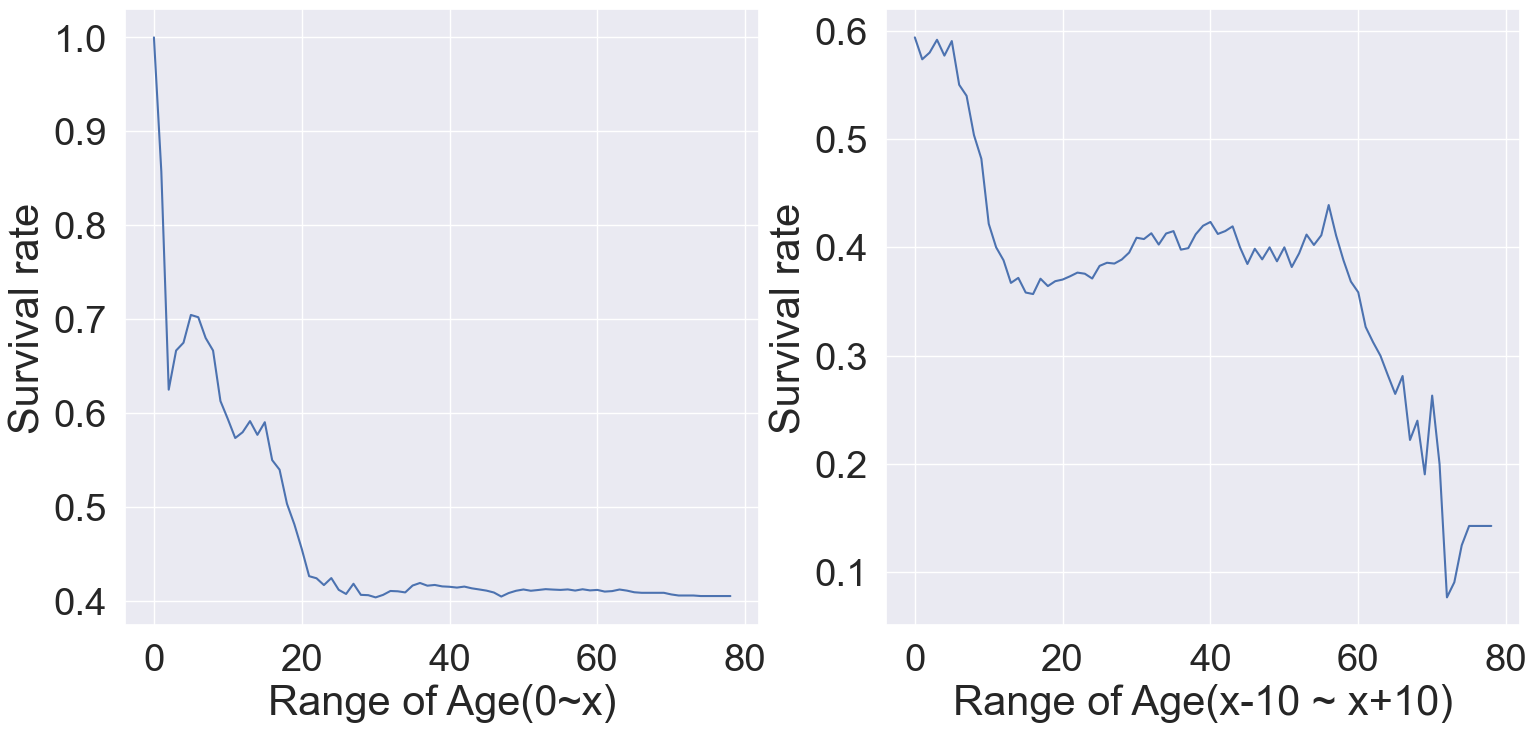

In [83]:
# 위에 그래프는 나이와 생존율의 관계는 나타내지 않으므로 해당 관계를 표현하고자 한다
arr1 = []
arr2 = []
# 예제에서는 복잡하게 생존된 사람 다 세고 이를 전체 인원으로 나눴지만 그냥 mean하면 된다.
for i in range(1, 80):
    arr1.append(df_train[df_train["Age"] < i]['Survived'].mean())
    arr2.append(df_train[abs(df_train["Age"]-i) < 10]['Survived'].mean())
f, ax = plt.subplots(1,2,figsize=(18,8))

ax[0].plot(arr1)
ax[1].plot(arr2)
ax[0].set_ylabel("Survival rate")
ax[1].set_ylabel("Survival rate")

ax[0].set_xlabel("Range of Age(0~x)")
ax[1].set_xlabel("Range of Age(x-10 ~ x+10)")

# 어느정도 나이가 영향이 있는것 같다.

<AxesSubplot: xlabel='Sex', ylabel='Age'>

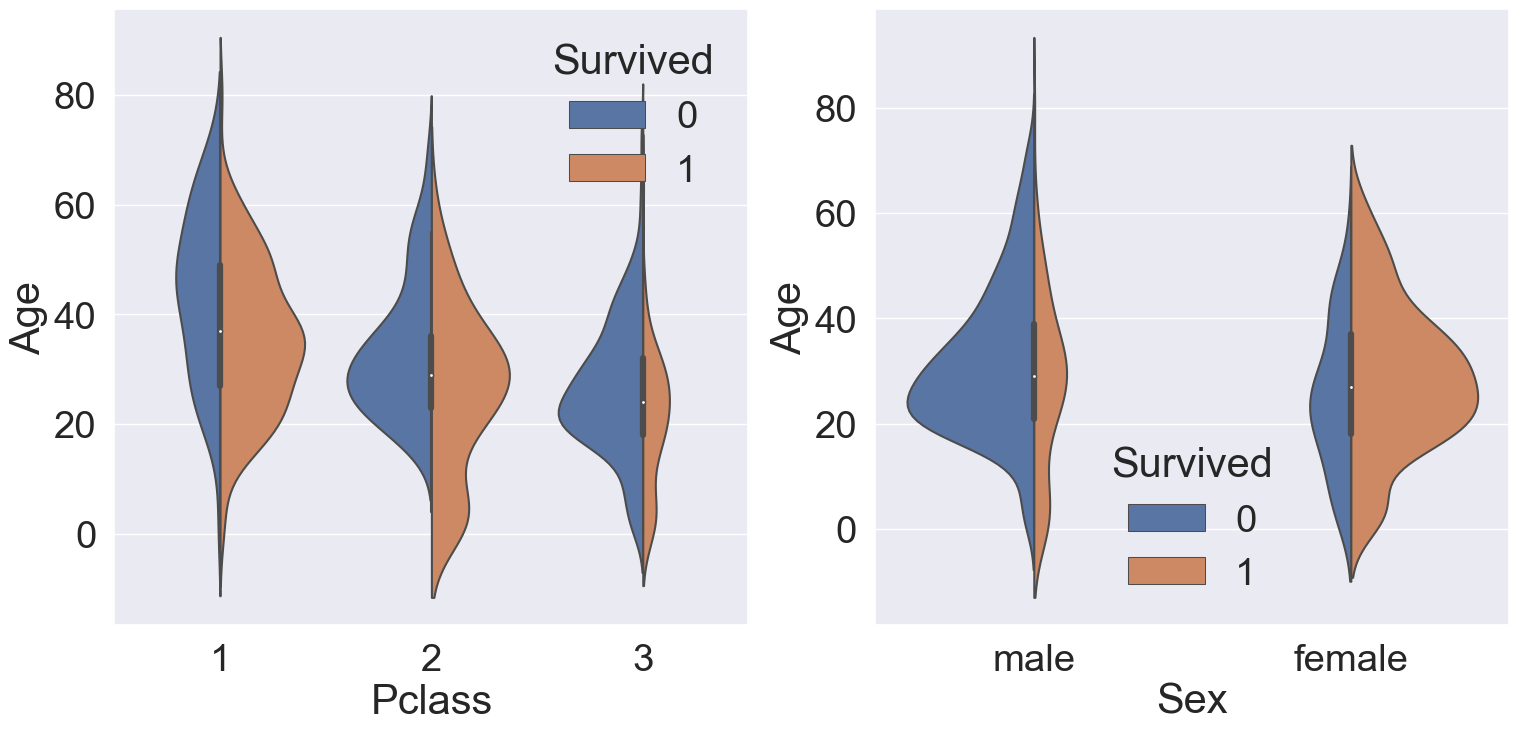

In [93]:
# 지금까지 했던 feature에 대해서 모두 보기 위하여 violinplot을 이용한다
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# split을 False로 설정하면 데칼코마니처럼 나옴
# split을 활성화 시켜야 hue가 양 옆에 나옴
# scale 을 count로 수행하면 x축의 Pclass에 해당되는 사람의 수를 나눈다고 한다.
sns.violinplot(x="Pclass", y="Age", data=df_train, hue="Survived", scale="count", split=True, ax= ax[0])

sns.violinplot(x="Sex", y="Age", data=df_train, hue="Survived", scale="count", split=True, ax=ax[1])

<AxesSubplot: xlabel='Embarked'>

<Figure size 700x700 with 0 Axes>

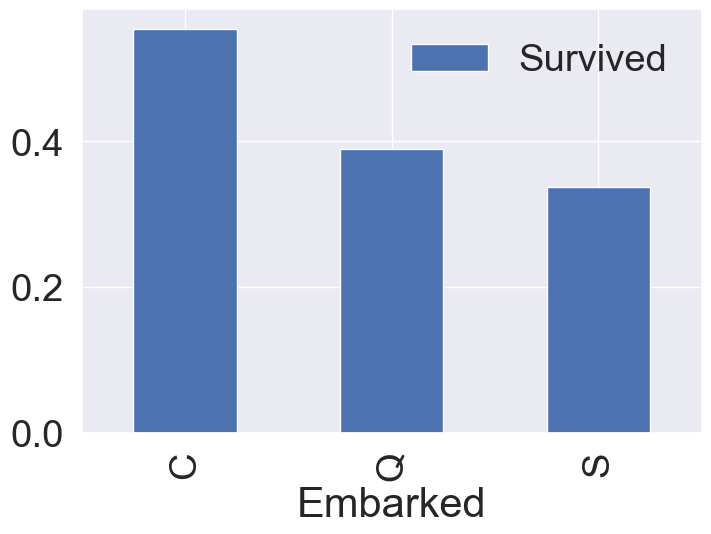

In [94]:
plt.figure(figsize=(7,7))
df_train[["Embarked", "Survived"]].groupby("Embarked").mean().plot.bar()

# C 항구에서 출발한 사람이 가장 생존률이 높은걸로 보임.

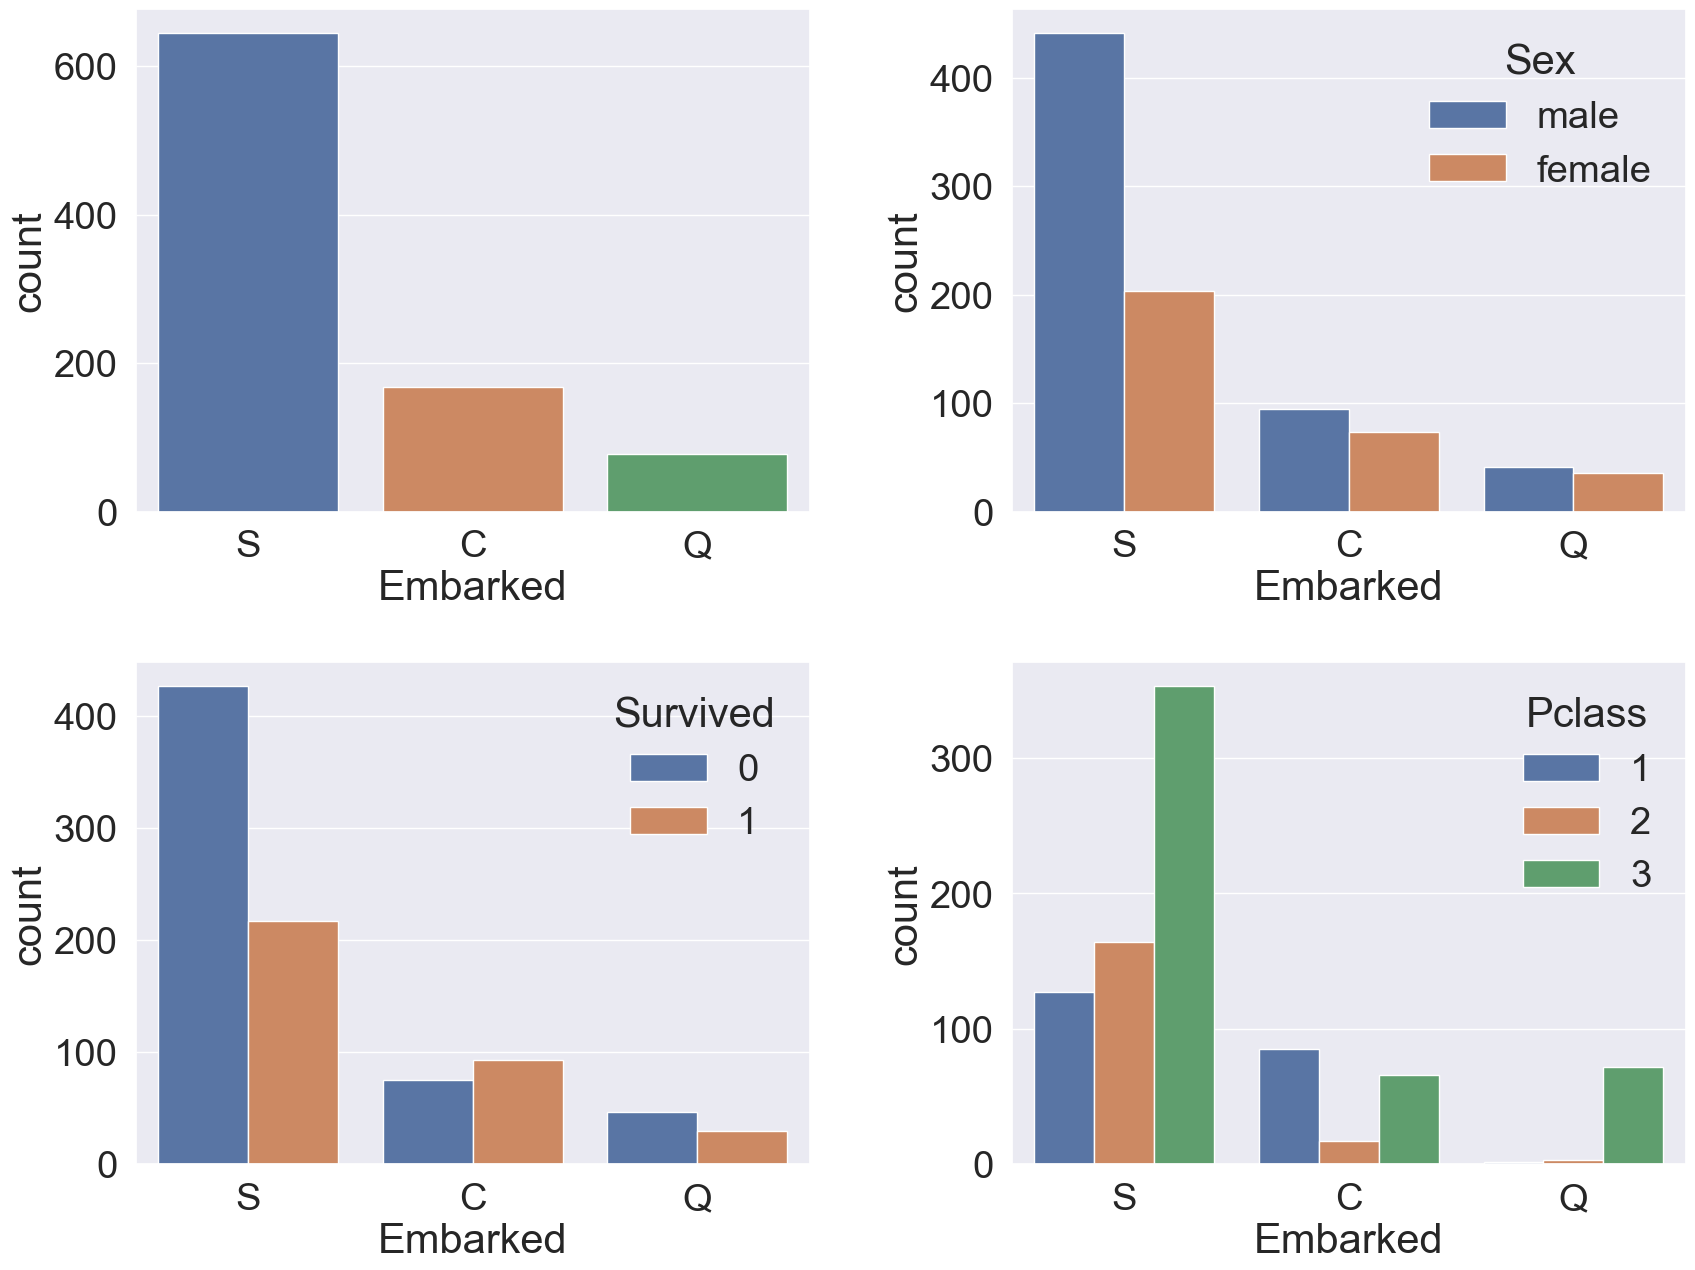

In [104]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot(x="Embarked", data=df_train, ax=ax[0][0])
sns.countplot(x='Embarked', data=df_train, hue="Sex", ax=ax[0][1])
sns.countplot(x="Embarked", data=df_train, hue="Survived", ax=ax[1][0])
sns.countplot(x="Embarked", data=df_train, hue="Pclass", ax=ax[1][1])

# subplot끼리의 margin을 조절해주는 변수
plt.subplots_adjust(wspace=0.3, hspace=0.3)

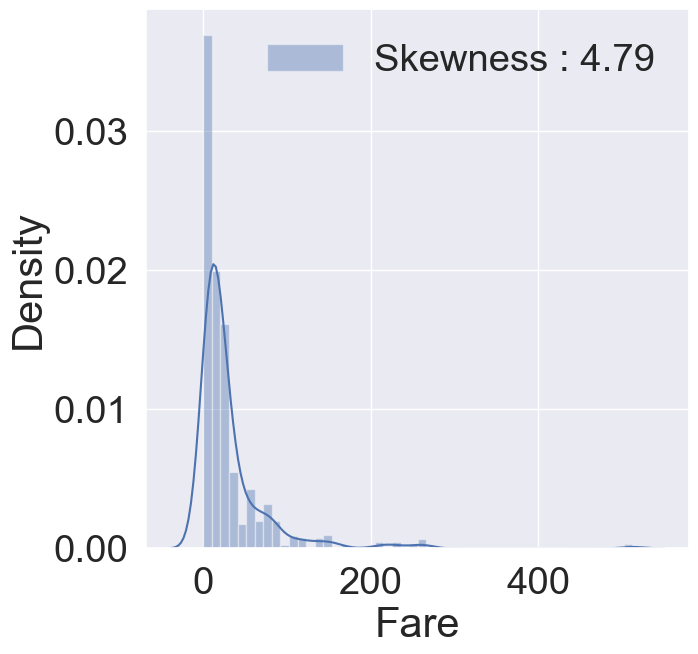

In [105]:
# distplot 또한 히스토그램 plot이라 할 수 있고, scale을 취한다.

plt.figure(figsize=(7,7))
# skewness: 왜도 라는 의미로 왼쪽으로 분포가 치우쳐져있으면 양수, 오른쪽으로 치우쳐져있으면 음수가 된다.
# 본문에서는 이렇게 엄청 치우쳐져있는 분포가 input으로 들어가면 문제가 발생한다한다.
g = sns.distplot(df_train['Fare'], color='b', label="Skewness : {:.2f}".format(df_train["Fare"].skew()))
g = g.legend(loc="best")

In [106]:
df_train['Fare'] = df_train["Fare"].map(lambda x:np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test["Fare"].map(lambda x:np.log(x) if x > 0 else 0)


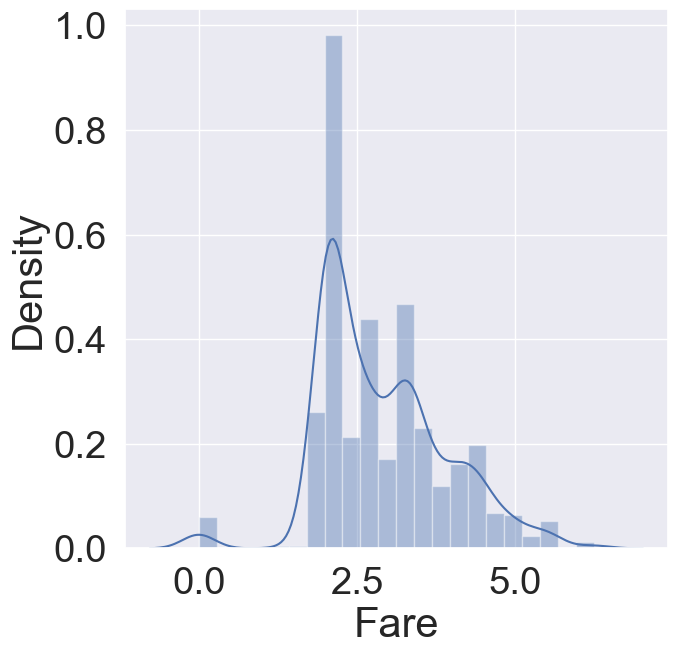

In [107]:
plt.figure(figsize=(7,7))
# log를 취하니 어느정도 괜찮은 분포가 되었다.
g = sns.distplot(df_train['Fare'], color='b', label="Skewness : {:.2f}".format(df_train["Fare"].skew()))

In [ ]:
# 추가로 age가 NULL이 많은데 이를 채우는 방법은
# Name을 이용하여 Name마다 (MR, MISS, MRS) 나이 평균값을 구하고 이름에 따라 정한다.

